In [1]:
!curl -L http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt -o neko.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  943k  100  943k    0     0   943k      0  0:00:01  0:00:01 --:--:--  806k


In [2]:
!ls

datalab  neko.txt  neko.txt.mecab


In [3]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3


Reading package lists... Done
Building dependency tree       
Reading state information... Done
aptitude is already the newest version (0.8.3-1ubuntu4).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
mecab is already installed at the requested version (0.996-3.1)
libmecab-dev is already installed at the requested version (0.996-3.1)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main-1)
git is already installed at the requested version (1:2.14.1-1ubuntu4.1)
make is already installed at the requested version (4.1-9.1)
curl is already installed at the requested version (7.55.1-1ubuntu2.5)
xz-utils is already installed at the requested version (5.2.2-1.3)
file is already installed at the requested version (1:5.32-1ubuntu0.1)
mecab is already installed at the requested version (0.996-3.1)
libmecab-dev is already installed at the requested version (0.996-3.1)
mecab-ipadic-utf8 is already installed at the requested version (2.7.0-20070801+main

In [0]:
import MeCab

第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

30． 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．



MeCabの出力フォーマット  
表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音

In [7]:
import MeCab
m = MeCab.Tagger()
print(m.parse('前々前世'))



前	名詞,副詞可能,*,*,*,*,前,マエ,マエ
々	記号,一般,*,*,*,*,々,々,々
前世	名詞,一般,*,*,*,*,前世,ゼンセイ,ゼンセイ
EOS



In [6]:
# neko.mecab.txtを生成する
import MeCab

filename = 'neko.txt'
out_filename = 'neko.txt.mecab'
m_f = open(out_filename, 'a')

f = open(filename, 'r')
lines = f.readlines()

counter = 0

for line in lines :
  m = MeCab.Tagger()
  m_f.write(m.parse(line))
  counter += 1

m_f.close()
print(counter)

9964


In [8]:
import MeCab

filename = 'neko.txt.mecab'

f = open(filename, 'r')
lines = f.readlines()
counter = 0

sentences = []

for line in lines :
  counter+= 1
  # タブで区切る
  line = m.parse(line).split("\t")
  
  # 該当行を絞り込む
  if len(line) < 2 :
    continue
  
  # 整形する（表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納）
  elements = line[1].split(",")
  if elements[1] == '空白' :
    continue
  word = {
      'surface' : line[0],
      'base' : elements[6],
      'pos' : elements[0],
      'pos1' : elements[1],
  }
  sentences.append(word)
  # for debugging
#   if counter > 20 :
#     break

# 
sentences

[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
 {'base': '*\nEOS\n', 'pos': '名詞', 'pos1': '固有名詞', 'surface': 'EOS'},
 {'base': '*\nEOS\n', 'pos': '名詞', 'pos1': '固有名詞', 'surface': 'EOS'},
 {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'で', 'pos': '接続詞', 'pos1': '*', 'surface': 'で'},
 {'base': 'ある', 'pos': '連体詞', 'pos1': '*', 'surface': 'ある'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
 {'base': '*\nEOS\n', 'pos': '名詞', 'pos1': '固有名詞', 'surface': 'EOS'},
 {'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
 {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
 {'base': '*\nEOS\n', 'pos': '名詞', 'pos1': '固有名詞', 'surface': 'EOS

In [8]:
# test
sentences[1]
# ok

{'base': '*\nEOS\n', 'pos': '名詞', 'pos1': '固有名詞', 'surface': 'EOS'}

31． 動詞
動詞の表層形をすべて抽出せよ．



In [128]:
# verbs = []
# for sentence in sentences :
#   if sentence[0]['pos'] == '動詞' :
#     verbs.append(sentence[0]['surface'])
# verbs

verbs_surface = [sentence['surface'] for sentence in sentences if sentence['pos'].find('動詞') == 0]
verbs_surface

['つか',
 'し',
 '泣い',
 'し',
 'いる',
 '見',
 '聞く',
 '捕え',
 '煮',
 '食う',
 '思わ',
 '載せ',
 'られ',
 '持ち上げ',
 'られ',
 'し',
 '落ちつい',
 '見',
 '見',
 'あろ',
 '思っ',
 '残っ',
 'いる',
 'れ',
 'し',
 '逢っ',
 '出会わ',
 'し',
 'し',
 'いる',
 '吹く',
 'せ',
 '弱っ',
 '飲む',
 '知っ',
 '坐っ',
 'する',
 'し',
 '動く',
 '動く',
 '分ら',
 '廻る',
 'なる',
 '思っ',
 'いる',
 'さり',
 'し',
 '出',
 'し',
 'いる',
 '考え出そ',
 '分ら',
 '付い',
 '見る',
 'い',
 '隠し',
 'し',
 '違っ',
 'い',
 'られ',
 '這い出し',
 '見る',
 '棄て',
 'られ',
 '這い出す',
 '坐っ',
 'し',
 '見',
 '出',
 'し',
 '泣い',
 'くれる',
 '考え付い',
 'やっ',
 '見',
 '渡っ',
 '減っ',
 'たく',
 '出',
 'し',
 'そろ',
 'し',
 '這っ',
 '行く',
 '出',
 '這入っ',
 'なる',
 '思っ',
 'もぐり込ん',
 'い',
 'し',
 '知れ',
 '云っ',
 '至る',
 'する',
 'なっ',
 'いる',
 '忍び込ん',
 '分ら',
 'なる',
 '減る',
 '降っ',
 'なっ',
 '行く',
 '考える',
 '這入っ',
 '見る',
 'し',
 '逢っ',
 '見る',
 'つか',
 '抛り出し',
 '思っ',
 'ねぶっ',
 '任せ',
 'い',
 '見',
 '這い',
 '上っ',
 '投げ出さ',
 'れ',
 '投げ出さ',
 'れ',
 '這い',
 '這い',
 '上っ',
 '投げ出さ',
 'れ',
 '繰り返し',
 'し',
 'いる',
 '云う',
 'なっ',
 'し',
 'やっ',
 'つまみ出さ',
 'れよ',
 'し',
 '出',
 'ぶら下げ',
 '向け',
 '出し',
 '出し',
 

32． 動詞の原形
動詞の原形をすべて抽出せよ．



In [129]:
verbs_base = [sentence['base'] for sentence in sentences if sentence['pos'].find('動詞') == 0]
verbs_base

['つく',
 'する',
 '泣く',
 'する',
 'いる',
 '見る',
 '聞く',
 '捕える',
 '煮る',
 '食う',
 '思う',
 '載せる',
 'られる',
 '持ち上げる',
 'られる',
 'する',
 '落ちつく',
 '見る',
 '見る',
 'ある',
 '思う',
 '残る',
 'いる',
 'れる',
 'する',
 '逢う',
 '出会う',
 'する',
 'する',
 'いる',
 '吹く',
 'する',
 '弱る',
 '飲む',
 '知る',
 '坐る',
 'する',
 'する',
 '動く',
 '動く',
 '分る',
 '廻る',
 'なる',
 '思う',
 'いる',
 'さる',
 'する',
 '出る',
 'する',
 'いる',
 '考え出す',
 '分る',
 '付く',
 '見る',
 'いる',
 '隠す',
 'する',
 '違う',
 'いる',
 'られる',
 '這い出す',
 '見る',
 '棄てる',
 'られる',
 '這い出す',
 '坐る',
 'する',
 '見る',
 '出る',
 'する',
 '泣く',
 'くれる',
 '考え付く',
 'やる',
 '見る',
 '渡る',
 '減る',
 'たく',
 '出る',
 'する',
 'そる',
 'する',
 '這う',
 '行く',
 '出る',
 '這入る',
 'なる',
 '思う',
 'もぐり込む',
 'いる',
 'する',
 '知れる',
 '云う',
 '至る',
 'する',
 'なる',
 'いる',
 '忍び込む',
 '分る',
 'なる',
 '減る',
 '降る',
 'なる',
 '行く',
 '考える',
 '這入る',
 '見る',
 'する',
 '逢う',
 '見る',
 'つく',
 '抛り出す',
 '思う',
 'ねぶる',
 '任せる',
 'いる',
 '見る',
 '這う',
 '上る',
 '投げ出す',
 'れる',
 '投げ出す',
 'れる',
 '這う',
 '這う',
 '上る',
 '投げ出す',
 'れる',
 '繰り返す',
 'する',
 'いる',
 '云う',
 'なる',
 'する',
 'やる',
 'つまみ出す',
 '

33． サ変名詞
サ変接続の名詞をすべて抽出せよ．



In [130]:
pos_sahen = [sentence['surface'] for sentence in sentences if sentence['pos1'].find('サ変接続') == 0]
pos_sahen

['見当',
 '記憶',
 '話',
 '装飾',
 '突起',
 '運転',
 '記憶',
 '分別',
 '決心',
 '我慢',
 '餓死',
 '訪問',
 '始末',
 '猶予',
 '遭遇',
 '乱暴',
 '我慢',
 '記憶',
 '返報',
 '勉強',
 '勉強',
 '昼寝',
 '珍重',
 '昼寝',
 '経験',
 '供',
 '供',
 '供',
 '供',
 '——',
 '——',
 '同居',
 '観察',
 '我儘',
 '断言',
 '同衾',
 '供',
 '迫害',
 '尊敬',
 '生活',
 '剿滅',
 '議論',
 '所有',
 '憤慨',
 '観念',
 '御馳走',
 '掠奪',
 '代言',
 '我儘',
 '我儘',
 '失敗',
 '話',
 '投書',
 '決心',
 '昼寝',
 '鑑定',
 '話',
 '述懐',
 '想像',
 '写生',
 '感心',
 '昼寝',
 '失笑',
 '揶揄',
 '写生',
 '欠伸',
 '自白',
 '造作',
 '彩色',
 '写生',
 '判然',
 '心中',
 '感服',
 '小便',
 '猶予',
 '失敬',
 '欠伸',
 '予定',
 '失望',
 '失敬',
 '漫罵',
 '小便',
 '増長',
 '増長',
 '我儘',
 '我慢',
 '報道',
 '供',
 '昼寝',
 '退屈',
 '加減',
 '一睡',
 '運動',
 '嘆賞',
 '佇立',
 '記憶',
 '珍重',
 '身動き',
 '挨拶',
 '鼓動',
 '軽蔑',
 '察',
 '肥満',
 '御馳走',
 '乱暴',
 '教育',
 '交際',
 '同盟',
 '敬遠',
 '軽侮',
 '問答',
 '御馳走',
 '邂逅',
 '邂逅',
 '雑談',
 '自慢',
 '質問',
 '発達',
 '比較',
 '覚悟',
 '自慢',
 '感心',
 '謹聴',
 '呼吸',
 '弁護',
 '話',
 '思案',
 '吶喊',
 '掃除',
 '感心',
 '喝采',
 '質問',
 '反対',
 '呈出',
 '大息',
 '——',
 '加減',
 '決心',
 '御馳走',
 '御馳走',
 '要心',
 '放蕩',
 '放蕩',
 '放蕩

34． 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．



In [139]:
noun_no_noun = []

for counter, sentence in enumerate(sentences) :
  if counter < 2 :
    continue
  A = sentences[counter-2]['pos']
  no = sentences[counter-1]['surface']
  B = sentences[counter]['pos']
  if A == '名詞' and no == 'の' and B == '名詞' :
    noun1 = sentences[counter-2]['surface']
    no = sentences[counter-1]['surface']
    noun2 = sentences[counter]['surface']
    
    noun_no_noun.append(noun1 + no + noun2)
    
noun_no_noun

['彼の掌',
 '掌の上',
 '書生の顔',
 'はずの顔',
 '顔の真中',
 '書生の掌',
 '掌の裏',
 '何の事',
 '肝心の母親',
 '藁の上',
 '池の上',
 '竹垣の崩れ',
 '一樹の蔭',
 '垣根の穴',
 '隣家の三',
 '時の通路',
 '一刻の猶予',
 '彼の書生',
 '以外の人間',
 'おさんの隙',
 'おさんの三',
 '胸の痞',
 '家の主人',
 '主人の方',
 '吾輩の顔',
 '自分の住',
 '吾輩の主人',
 '家のもの',
 'うちのもの',
 '彼の書斎',
 '皮膚の色',
 '彼の毎夜',
 '以外のもの',
 '主人の傍',
 '彼の膝',
 '膝の上',
 '経験の上',
 '飯櫃の上',
 '炬燵の上',
 'ここのうち',
 '供の寝床',
 '彼等の中間',
 '供の一',
 '例の神経',
 '性の主人',
 '自分の勝手',
 '吾輩の方',
 '台所の板の間',
 '吾輩の尊敬',
 '玉のよう',
 'そこの家',
 '家の書生',
 '裏の池',
 '親子の愛',
 '刺の頭',
 '鰡の臍',
 '彼等のため',
 '軍人の家',
 '代言の主人',
 '教師の家',
 '猫の時節',
 '吾輩の家',
 '家の主人',
 '胃弱の癖',
 '月の月給',
 '当分の間',
 '主人の述懐',
 '彼の友',
 '金縁の眼鏡',
 '主人の顔',
 '訳のもの',
 '利の大家',
 '金縁の裏',
 '吾輩の後ろ',
 '彼の友',
 '吾輩の輪廓',
 '顔のあたり',
 '上乗の出来',
 '顔の造作',
 '不器量の吾輩',
 '吾輩の主人',
 '斯産の猫',
 '斑入りの皮膚',
 '主人の彩色',
 '一種の色',
 '身内の筋肉',
 '主人の予定',
 '悪口の言いよう',
 '人の気',
 '彼の背中',
 'こっちの便利',
 '自己の力量',
 '人間の不徳',
 '吾輩の家',
 '家の裏',
 '昼寝の出来',
 '浩然の気',
 '小春の穏',
 '日の二',
 '茶の木の根',
 '西側の杉',
 '垣のそば',
 '純粋の黒',
 '彼の皮膚',
 '皮膚の上',
 '毛の間',
 '吾輩の倍',
 '嘆賞の念',
 '好奇の心'

35． 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．



In [151]:
nouns = []
tmp_noun = ''
chk_noun = False
continue_noun = False

for counter, sentence in enumerate(sentences) :
  
  if sentence['surface'] == 'EOS' :
    continue
  chk_noun = True if sentence['pos'] == '名詞' else False
  
  # 名詞の場合、一時リストに追加するだけ
  if chk_noun :
    tmp_noun += sentence['surface']
    continue_noun = True
    continue
  else :
    if continue_noun :
      nouns.append(tmp_noun)
      continue_noun = False
      tmp_noun = ''
  
nouns

['一吾輩',
 '猫',
 '名前',
 'どこ',
 '生れ',
 '見当',
 '何',
 '所',
 'ニャーニャー',
 'いた事',
 '記憶',
 '吾輩',
 'ここ',
 '始め',
 '人間',
 'もの',
 'あと',
 'それ',
 '書生',
 '人間',
 '一番獰悪',
 '種族',
 '書生',
 '我々',
 '話',
 '当時',
 '何',
 '考',
 '彼',
 '掌',
 'スー',
 '時',
 '感じ',
 '掌',
 '上',
 '書生',
 '顔',
 '人間',
 'もの',
 '始',
 '時妙',
 'もの',
 '感じ',
 '一毛',
 '装飾',
 'はず',
 '顔',
 '薬缶',
 'その後猫',
 '輪',
 '一度',
 '事',
 '顔',
 '真中',
 '突起',
 '穴',
 'ぷうぷうと煙',
 '咽',
 'これ',
 '人間',
 '煙草',
 'もの',
 '事',
 '頃',
 '書生',
 '掌',
 '裏',
 '心持',
 '非常',
 '速力',
 '運転',
 '始め',
 '書生',
 '自分',
 '眼',
 '胸',
 '助',
 '音',
 '眼',
 '火',
 'それ',
 '記憶',
 'あと',
 '何',
 '事',
 '気',
 '書生',
 'たくさん',
 '兄弟',
 '一疋',
 '見え',
 '肝心',
 '母親',
 '姿',
 '上今',
 '所',
 '眼',
 '何',
 '容子',
 '非常',
 '吾輩',
 '藁',
 '上',
 '笹原',
 '思い',
 '笹原',
 '向う',
 '池',
 '吾輩',
 '池',
 '考え',
 'これ',
 '分別',
 '書生',
 '迎',
 'ニャー',
 'ニャー',
 '試み',
 '誰',
 '池',
 '上',
 '風',
 '日',
 '暮れ',
 '腹',
 '非常',
 '泣き',
 '声',
 '仕方',
 '何',
 '食物',
 '所',
 '決心',
 '池',
 '左',
 '廻り始め',
 '非常',
 'そこ',
 '我慢',
 '事',
 '人間',
 '所',
 'ここ',
 '竹垣',
 '崩れ',
 '穴',
 '邸',
 '縁',
 

36． 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．



In [161]:
word_count = {}

for counter, sentence in enumerate(sentences) :
  
  if sentence['surface'] == 'EOS' :
    continue
  
  word = sentence['surface']
  
  if word in word_count.keys() :
    word_count[word] = int(word_count[word]) + 1
  else :
    word_count[word] = 1


sorted(word_count.items(), key=lambda x: x[1], reverse=True)

[('の', 9195),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6428),
 ('に', 6246),
 ('を', 6079),
 ('と', 5513),
 ('が', 5344),
 ('た', 3988),
 ('で', 3806),
 ('「', 3231),
 ('」', 3225),
 ('も', 2480),
 ('し', 2428),
 ('ない', 2390),
 ('だ', 2363),
 ('から', 2044),
 ('ある', 1740),
 ('な', 1625),
 ('ん', 1568),
 ('か', 1534),
 ('いる', 1249),
 ('事', 1207),
 ('へ', 1035),
 ('もの', 1006),
 ('う', 995),
 ('する', 992),
 ('君', 973),
 ('です', 973),
 ('云う', 937),
 ('主人', 932),
 ('よう', 696),
 ('ね', 683),
 ('この', 649),
 ('御', 637),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 557),
 ('何', 549),
 ('そう', 546),
 ('なる', 531),
 ('さ', 524),
 ('い', 511),
 ('よ', 509),
 ('なら', 492),
 ('吾輩', 481),
 ('ます', 458),
 ('じゃ', 452),
 ('…', 433),
 ('これ', 414),
 ('なっ', 404),
 ('それ', 381),
 ('来', 364),
 ('れ', 356),
 ('見', 352),
 ('時', 347),
 ('でも', 346),
 ('迷亭', 343),
 ('三', 332),
 ('ませ', 330),
 ('いい', 320),
 ('——', 319),
 ('まで', 313),
 ('ところ', 313),
 ('方', 312),
 ('二', 303),
 ('ず', 299),
 ('上', 296),
 ('まし', 290),
 ('寒月', 286),
 ('顔', 

37． 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．



<Container object of 5 artists>

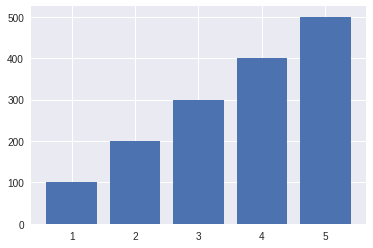

In [166]:
%matplotlib inline
# plt.bar(left, height, width=0.8, bottom=None, hold=None, data=None, **kwargs)
import numpy as np
import matplotlib.pyplot as plt
 
left = np.array([1, 2, 3, 4, 5])
height = np.array([100, 200, 300, 400, 500])
plt.bar(left, height)


<Container object of 10 artists>

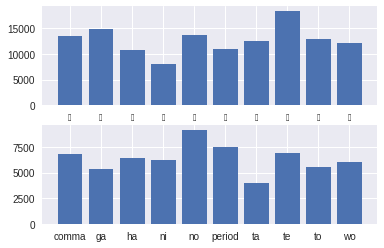

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

word_count = {}

for counter, sentence in enumerate(sentences) :
  
  if sentence['surface'] == 'EOS' :
    continue
  
  word = sentence['surface']
  
  if word in word_count.keys() :
    word_count[word] = int(word_count[word]) + 1
  else :
    word_count[word] = 1


sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)


fig, ax = plt.subplots(2, 1)


left = []
height = []

for num, word in enumerate(sorted_word_count) :
  if num < 10 :
    left.append(word[0])
    height.append(word[1])

ax[0].bar(left, height)
# ('の', 9195),
# ('。', 7486),
# ('て', 6868),
# ('、', 6772),
# ('は', 6428),
# ('に', 6246),
# ('を', 6079),
# ('と', 5513),
# ('が', 5344),
# ('た', 3988),
# left = np.array(['の', '。', 'て','、', 'は', 'に', 'を', 'と', 'が', 'た'])
# height = np.array([9195, 7486, 6868, 6772, 6428, 6246, 6079, 5513, 5344, 3988])
# plt.bar(left, height)

# 豆腐問題...
left = ['no', 'period', 'te','comma', 'ha', 'ni', 'wo', 'to', 'ga', 'ta']
height = [9195, 7486, 6868, 6772, 6428, 6246, 6079, 5513, 5344, 3988]
ax[1].bar(left, height)

38． ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．



(array([   0.,    0., 6065.,    0., 2226.,    0., 1098.,    0.,  681.,
           0.,  533.,    0.,  341.,    0.,  278.,    0.,  231.,    0.,
         166.,    0.,  132.,    0.,  114.,    0.,  109.,    0.,  102.,
           0.,   90.,    0.,   82.,    0.,   60.,    0.,   52.,    0.,
          62.,    0.,   51.,    0.,   45.,    0.,   25.,    0.,   25.,
           0.,   37.,    0.,   37.,   28.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <a list of 50 Patch objects>)

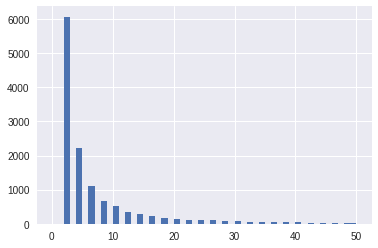

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

word_count = {}

for counter, sentence in enumerate(sentences) :
  
  if sentence['surface'] == 'EOS' :
    continue
  
  word = sentence['surface']
  
  if word in word_count.keys() :
    word_count[word] = int(word_count[word]) + 1
  else :
    word_count[word] = 1

sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

left = [[x[0]] for x in sorted_word_count]
height = [x[1] for x in sorted_word_count]

plt.hist(height, bins=50, range=(0, 50))

39． Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．



Text(0,0.5,'frequency')

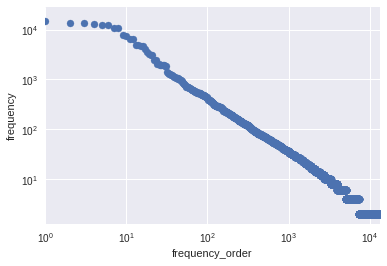

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

word_count = {}

for counter, sentence in enumerate(sentences) :
  
  if sentence['surface'] == 'EOS' :
    continue
  
  word = sentence['surface']
  
  if word in word_count.keys() :
    word_count[word] = int(word_count[word]) + 1
  else :
    word_count[word] = 1

sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

height = [x[1] for x in sorted_word_count]

plt.scatter(range(len(height)), height)
# 対数化
plt.xscale('log')
plt.yscale('log')
# 軸の範囲調整
plt.xlim(1, len(height))
# plt.ylim(1, height.all())
# ラベルづけ
plt.xlabel('frequency_order')
plt.ylabel('frequency')

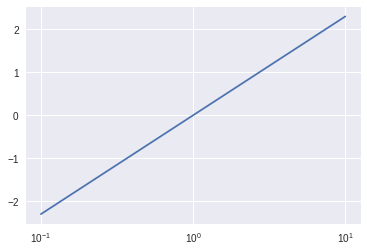

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.xscale("log")
x = np.arange(0.1,10,0.01)
y = np.log(x)

plt.plot(x,y)
plt.show()

In [44]:
sorted_word_count
left = [x[0] for x in sorted_word_count]
height = [x[1] for x in sorted_word_count]

left
height
# dataset = [left, height]
# dataset

[18390,
 14972,
 13736,
 13544,
 12856,
 12492,
 12158,
 11026,
 10688,
 7976,
 7612,
 6462,
 6450,
 4960,
 4856,
 4780,
 4726,
 4088,
 3480,
 3250,
 3136,
 3068,
 2498,
 2414,
 2070,
 2012,
 1990,
 1984,
 1946,
 1946,
 1874,
 1864,
 1392,
 1366,
 1298,
 1274,
 1234,
 1204,
 1152,
 1114,
 1098,
 1092,
 1062,
 1048,
 1022,
 1018,
 984,
 962,
 916,
 904,
 866,
 828,
 808,
 762,
 728,
 712,
 704,
 694,
 692,
 686,
 664,
 660,
 640,
 638,
 626,
 626,
 624,
 606,
 598,
 592,
 580,
 572,
 564,
 556,
 548,
 546,
 544,
 540,
 538,
 536,
 532,
 524,
 520,
 520,
 516,
 498,
 496,
 496,
 492,
 482,
 478,
 468,
 464,
 462,
 462,
 450,
 450,
 442,
 440,
 432,
 426,
 410,
 398,
 390,
 390,
 390,
 388,
 388,
 378,
 370,
 364,
 362,
 358,
 350,
 350,
 346,
 338,
 338,
 324,
 318,
 316,
 312,
 308,
 306,
 304,
 302,
 300,
 300,
 300,
 298,
 298,
 296,
 294,
 292,
 292,
 288,
 286,
 286,
 286,
 286,
 284,
 282,
 280,
 278,
 276,
 274,
 268,
 268,
 266,
 264,
 262,
 258,
 254,
 252,
 250,
 242,
 240,
 23